In [1]:
import sys
import os
sys.path.append('../../')
os.chdir('../../')

import pandas as pd
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

/home/caumel/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = f"../resultados/"
prueba_15_preprocessing = f"15_X_X_Total_Yes/"
prueba_15_no_preprocessing = f"15_X_X_Total_No/"
prueba_15_summer = f"15_X_summer_Total_Yes/"
prueba_15_winter = f"15_X_winter_Total_Yes/"

### Prueba 1

In [4]:
path_final = os.path.join(path,prueba_15_preprocessing)

In [8]:
text_file = open(os.path.join(path_final,"coeffs_1_total.txt"), "r")
data = text_file.read()
text_file.close()

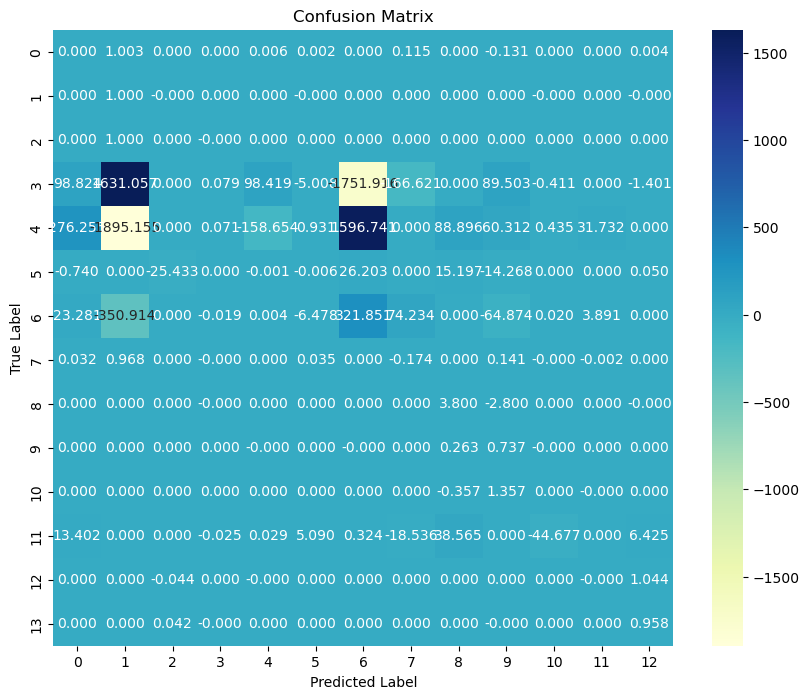

In [15]:
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.array(matrix)

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(np_matrix, annot=True, cmap="YlGnBu", fmt=".3f")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
a = pl.read_csv("./data/final_files/normal_rare/high.csv")
a.shape

(28587840, 18)

In [4]:
list(a["year"].unique())

[2000, 2006, 2009, 2010, 2013, 2014, 2017]

### Reducir dataset muy grandes

In [ ]:
import random
import pandas as pd
import polars as pl
import os

files = ["low"]

for file in files:
    new_df = pl.DataFrame()
    print(f"./data/final_files/normal_rare/{file}.csv")
    df = pl.read_csv(os.path.join(f"./data/final_files/normal_rare/{file}.csv"))
    years = list(df["year"].unique())
    # print(years)
    n_events_total = 27585 / len(years)
    # print(n_events_total)
    for index,year in enumerate(years):
        df_new_year = df.filter(pl.col("year") == year)
        # n_events = (27585 * df.filter(df["year"] == year).shape[0]) / df.shape[0]
        print(year)
        n_to_take = int(n_events_total/38)
        # print(n_to_take)
        for windfarm in range(0,38):
            df_new = df_new_year.filter(pl.col("index") == windfarm)
            n_events = list(df_new["n_event"].unique())
            # random_indices = random.sample(range(0,n_events+1), min(n_events,n_to_take))
            random_indices = random.sample(n_events, min(len(n_events),n_to_take))
            df_selected = df_new.filter(df_new['n_event'].is_in(random_indices))
            new_df = pl.concat([new_df,df_selected], rechunk=True)
            # print(new_df.shape)
    new_df.write_csv(os.path.join("./data/final_files/normal_rare_reducido",f"{file}.csv"))

In [ ]:
a = pd.read_csv("./data/final_files/normal_13_reducido/high.csv")


### Prueba 2

In [3]:
path_final = os.path.join(path,prueba_15_preprocessing)
text_file = open(os.path.join(path_final,"coeffs_1_total.txt"), "r")
data = text_file.read()
text_file.close()
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.array(matrix)

In [2]:
import sys
sys.path.append('../')

from src.IKM.data_exploration.distances import DistanceMeasurer
distance_measurer = DistanceMeasurer()

In [12]:
final_str = ""

print(os.listdir("./resultados/ideal_clusters/normal_15_summer"))
dirs = [
    r"./resultados/ideal_clusters/normal_15_summer/coeffs_1_eucl_ideal.txt"
    r"./resultados/ideal_clusters/normal_15_winter/coeffs_1_eucl_ideal.txt"
]

for dir_1 in dirs:
    for dir_2 in dirs:
        if dir_1 == dir_2:
            continue
print(dir_1)
file_path = rf'distance.txt'
distance = distance_measurer.distance_between_coeffs_combined_objs(dir_1, dir_2)

['cluster_split_eucl_ideal.txt', 'cluster_split_total_ideal.txt', 'coeffs_1_eucl_ideal.txt', 'coeffs_1_total_ideal.txt', 'coeffs_2_eucl_ideal.txt', 'coeffs_2_total_ideal.txt', 'coeffs_3_eucl_ideal.txt', 'coeffs_3_total_ideal.txt']
./resultados/ideal_clusters/normal_15_summer/coeffs_1_eucl_ideal.txt./resultados/ideal_clusters/normal_15_winter/coeffs_1_eucl_ideal.txt


FileNotFoundError: ./resultados/ideal_clusters/normal_15_summer/coeffs_1_eucl_ideal.txt./resultados/ideal_clusters/normal_15_winter/coeffs_1_eucl_ideal.txt not found.

In [8]:
data = [-22.667990349083567,
-0.00013010590173898179,
-0.00014715510780948158,
-31485.270829276134,
-136660.603691003,
-92.60746802990309,
-4064.168504925796,
-15.464553372193755,
-6.668008670619523e-05,
-1.9297618996310062e-05,
-2.0476675723174638e-05,
-13345.872530530547,
-3.506113840395786e-06,
-3.0963102858050373e-06]

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']


sorted_pairs = sorted(zip(columns, data), key=lambda x: x[1], reverse=False)

# Unzip the sorted pairs into two lists
sorted_columns, sorted_data = zip(*sorted_pairs)

print(sorted_columns)
print(sorted_data)

('blh', 'cape', 'wdir100m', 'z', 'd2m', 'cc', 'relative_humidity', 'pv', 'o3', 't2m', 't135m', 't100m', 'wspeed135m', 'wspeed100m')
(-136660.603691003, -31485.270829276134, -13345.872530530547, -4064.168504925796, -92.60746802990309, -22.667990349083567, -15.464553372193755, -0.00014715510780948158, -0.00013010590173898179, -6.668008670619523e-05, -2.0476675723174638e-05, -1.9297618996310062e-05, -3.506113840395786e-06, -3.0963102858050373e-06)


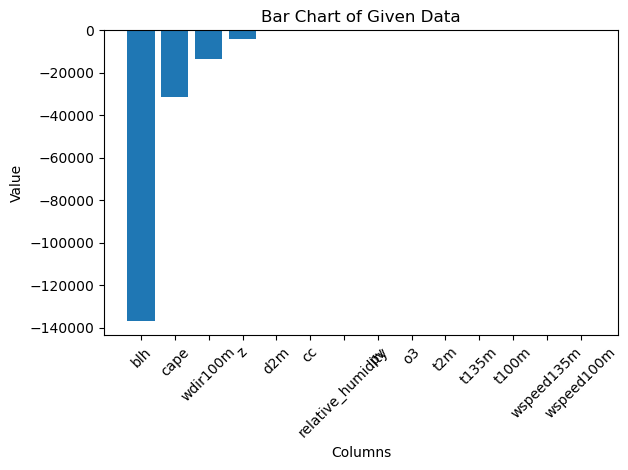

In [9]:
import matplotlib.pyplot as plt

plt.bar(sorted_columns, sorted_data)

# Add title and labels
plt.title("Bar Chart of Given Data")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()

('blh', 'cape', 'wdir100m', 'z', 'd2m', 'cc', 'relative_humidity', 'o3', 'pv', 't2m', 't135m', 't100m', 'wspeed135m', 'wspeed100m')
(-232519.9001484204, -49415.66843856583, -30808.116698604423, -11995.482641110006, -210.36563083207673, -52.8627508823361, -10.843086673180215, -0.00026968386695827616, -0.00026071052582625877, -0.00015820433220550833, -5.6434681747771906e-05, -3.961379206070435e-05, -9.769758175152618e-06, -9.748980727547311e-06)


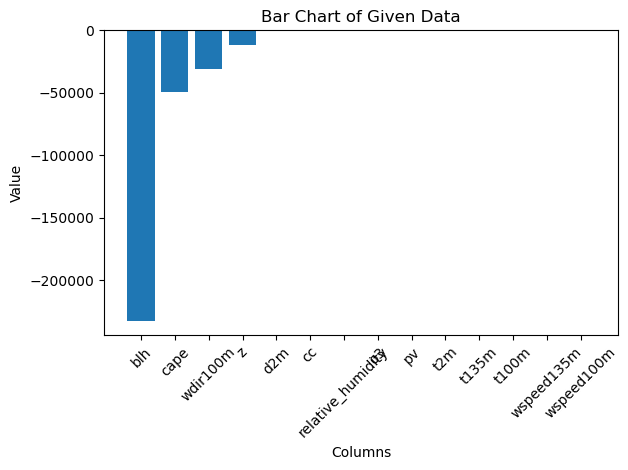

In [10]:
data = [-52.8627508823361, -0.00026968386695827616, -0.00026071052582625877, -49415.66843856583, -232519.9001484204, -210.36563083207673, -11995.482641110006, -10.843086673180215, -0.00015820433220550833, -3.961379206070435e-05, -5.6434681747771906e-05, -30808.116698604423, -9.769758175152618e-06, -9.748980727547311e-06]
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']
sorted_pairs = sorted(zip(columns, data), key=lambda x: x[1], reverse=False)

# Unzip the sorted pairs into two lists
sorted_columns, sorted_data = zip(*sorted_pairs)

print(sorted_columns)
print(sorted_data)

import matplotlib.pyplot as plt

plt.bar(sorted_columns, sorted_data)

# Add title and labels
plt.title("Bar Chart of Given Data")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path_normal = "../resultados/Resultados presentados a la profesora/normal/coeffs_1_eucl.txt"
path_ideal = "../resultados/Resultados presentados a la profesora/ideal/coeffs_1_eucl_ideal.txt"

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']


text_file = open(os.path.join(path_ideal), "r")
data = text_file.read()
text_file.close()
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]

np_matrix = np.array(matrix)
abs_matrix = np.abs(np_matrix).tolist()

for idx, lista in enumerate(abs_matrix):
    lista.insert(idx, -1)

np_matrix = np.array(matrix)

# for idx, lista in enumerate(np_matrix):
#     np_matrix[idx] = np.insert(lista, idx, 200)

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(abs_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=columns, yticklabels=columns)
plt.ylabel('Variables')
plt.xlabel('Correlation')
plt.title('Confusion Matrix')
plt.show()

/home/caumel/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


FileNotFoundError: [Errno 2] No such file or directory: '../resultados/Resultados presentados a la profesora/ideal/coeffs_1_eucl_ideal.txt'

### Prueba 3 real, coef correlation

In [ ]:
import sys
import os
sys.path.append('../../')
os.chdir('../../')

(14, 14)
['.git', '.gitignore', 'coef_13_1_eucl.png', 'coef_13_1_total.png', 'coef_13_2_eucl.png', 'coef_13_2_total.png', 'coef_13_3_eucl.png', 'coef_13_3_total.png', 'coef_15_1_eucl.png', 'coef_15_1_total.png', 'coef_15_2_eucl.png', 'coef_15_2_total.png', 'coef_15_3_eucl.png', 'coef_15_3_total.png', 'coef_vs_summer_1_eucl.png', 'coef_vs_summer_1_total.png', 'coef_vs_summer_2_eucl.png', 'coef_vs_summer_2_total.png', 'coef_vs_summer_3_eucl.png', 'coef_vs_summer_3_total.png', 'coef_vs_winter_1_total.png', 'coef_vs_winter_2_eucl.png', 'coef_vs_winter_2_total.png', 'coef_vs_winter_3_eucl.png', 'coef_vs_winter_3_total.png', 'comandos.txt', 'data', 'docs', 'hmml-matlab', 'hmml-python', 'IKM', 'images', 'Pruebas.xlsx', 'README.md', 'resultados', 'src']


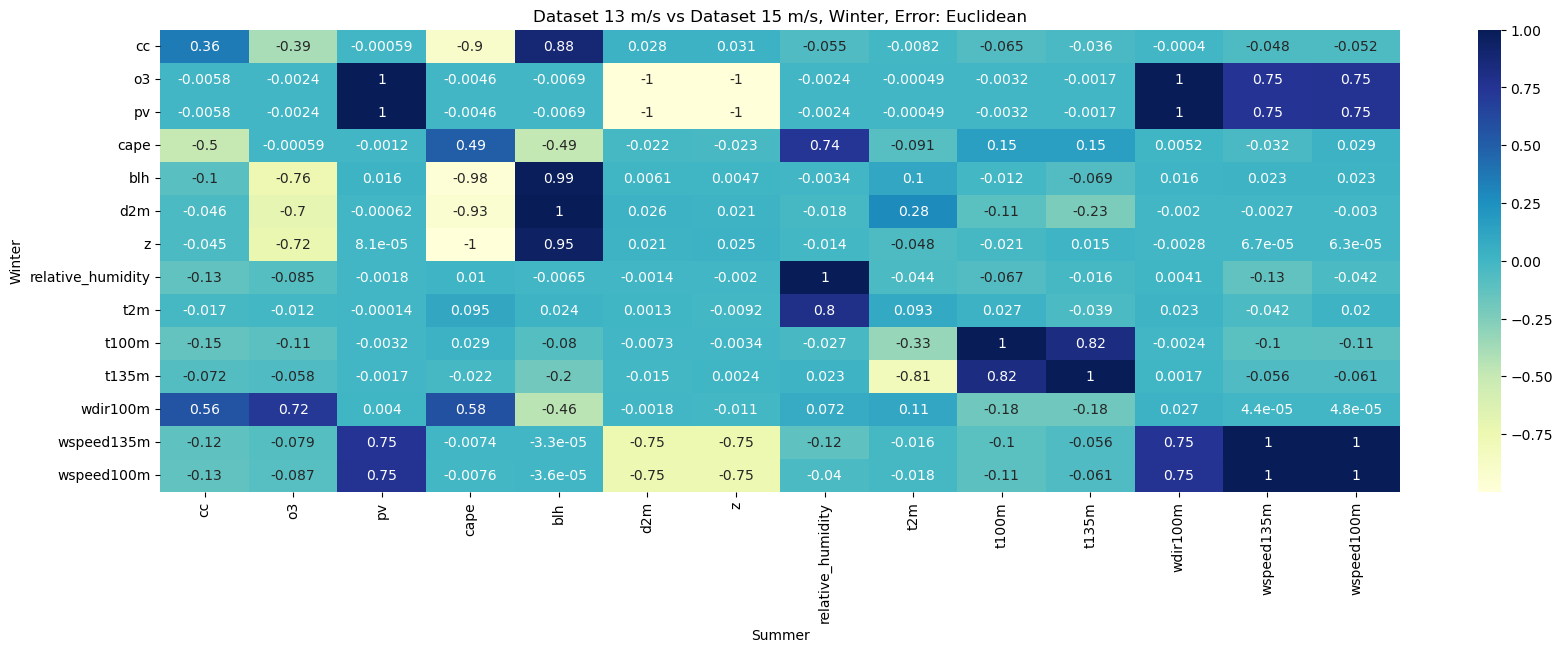

In [33]:
from src.IKM.data_exploration.distances import DistanceMeasurer
distance_measurer = DistanceMeasurer()

dirs = [
    r"./resultados/ideal_clusters/normal_winter/coeffs_1_eucl_ideal.txt",
    r"./resultados/ideal_clusters/normal_15_winter/coeffs_1_eucl_ideal.txt"
]

distance = distance_measurer.correlation_between_coeffs(dirs," ",True,title="Dataset 13 m/s vs Dataset 15 m/s, Winter, Error: Euclidean",save = "coef_vs_winter_1_eucl.png")

# dirs = [
#     r"./resultados/ideal_clusters/normal_15_summer/coeffs_1_eucl_ideal.txt",
#     r"./resultados/ideal_clusters/normal_15_winter/coeffs_1_eucl_ideal.txt"
# ]

# distance = distance_measurer.correlation_between_coeffs(dirs," ",True,save = "asda.png")

# dirs = [
#     r"./resultados/ideal_clusters/normal_summer/coeffs_2_eucl_ideal.txt",
#     r"./resultados/ideal_clusters/normal_winter/coeffs_2_eucl_ideal.txt"
# ]

# distance = distance_measurer.correlation_between_coeffs(dirs," ",True,save = "asda.png")

### Prueba 4 real, Frobenius

In [ ]:
import sys
import os
sys.path.append('../../')
os.chdir('../../')

In [46]:
print(os.listdir())

dirs = [
    r"./resultados/ideal_clusters/normal_winter/coeffs_1_eucl_ideal.txt",
    r"./resultados/ideal_clusters/normal_winter/coeffs_1_total_ideal.txt",
    r"./resultados/ideal_clusters/normal_15_winter/coeffs_1_eucl_ideal.txt",
    r"./resultados/ideal_clusters/normal_15_winter/coeffs_1_total_ideal.txt"

]

for dir_1 in dirs:
    for dir_2 in dirs:
        if dir_1 == dir_2:
            continue
        else:
            distance = distance_measurer.distance_between_coeffs_combined_objs(dir_1, dir_2)
            print(dir_1.split("/")[-1],dir_2.split("/")[-1],distance)

# file_path = rf'distance.txt'
# distance = distance_measurer.distance_between_coeffs_combined_objs(dir_1, dir_2)

['.git', '.gitignore', 'coef_13_1_eucl.png', 'coef_13_1_total.png', 'coef_13_2_eucl.png', 'coef_13_2_total.png', 'coef_13_3_eucl.png', 'coef_13_3_total.png', 'coef_15_1_eucl.png', 'coef_15_1_total.png', 'coef_15_2_eucl.png', 'coef_15_2_total.png', 'coef_15_3_eucl.png', 'coef_15_3_total.png', 'coef_vs_summer_1_eucl.png', 'coef_vs_summer_1_total.png', 'coef_vs_summer_2_eucl.png', 'coef_vs_summer_2_total.png', 'coef_vs_summer_3_eucl.png', 'coef_vs_summer_3_total.png', 'coef_vs_winter_1_eucl.png', 'coef_vs_winter_1_total.png', 'coef_vs_winter_2_eucl.png', 'coef_vs_winter_2_total.png', 'coef_vs_winter_3_eucl.png', 'coef_vs_winter_3_total.png', 'comandos.txt', 'data', 'docs', 'frobenius_norm.txt', 'hmml-matlab', 'hmml-python', 'IKM', 'images', 'Pruebas.xlsx', 'README.md', 'resultados', 'src']
coeffs_1_eucl_ideal.txt coeffs_1_total_ideal.txt 3594.282717707526
coeffs_1_eucl_ideal.txt coeffs_1_eucl_ideal.txt 26894.745625539577
coeffs_1_eucl_ideal.txt coeffs_1_total_ideal.txt 26509.16308524622
c

### Plot error and coeffi

['blh', 'wdir100m', 'z', 'cape', 'd2m', 'cc', 'relative_humidity', 't2m', 't135m', 'wspeed135m', 'wspeed100m', 'o3', 'pv', 't100m']
[-4704793.116697219, -251788.29001085946, -47605.6592101596, -1260.035588613997, -18.808961736248566, -2.5350464391000074, -0.04319933580512725, -0.04057460945149067, -0.0067738981981635225, -2.365013074268063e-09, -2.3255282144418743e-09, -2.128949461166485e-09, -6.092051307859947e-10, 0.0008659091651867477]


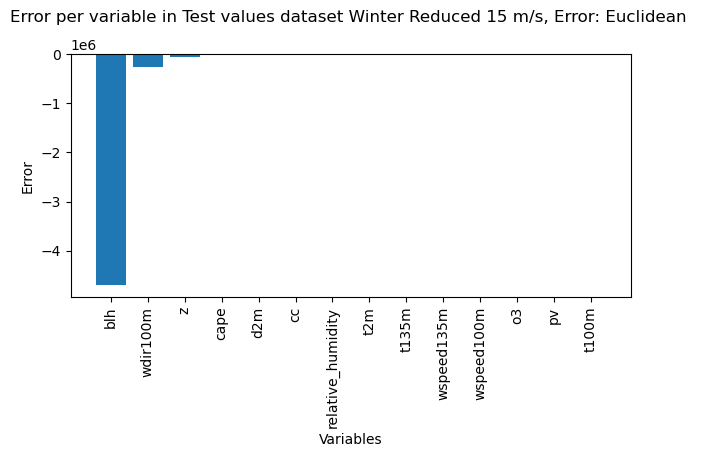

In [105]:
input_str = """
5:-4704793.116697219
12:-251788.29001085946
7:-47605.6592101596
4:-1260.035588613997
6:-18.808961736248566
1:-2.5350464391000074
8:-0.04319933580512725
9:-0.04057460945149067
11:-0.0067738981981635225
13:-2.365013074268063e-09
14:-2.3255282144418743e-09
2:-2.128949461166485e-09
3:-6.092051307859947e-10
10:0.0008659091651867477
"""

# Splitting the string into lines
lines = input_str.strip().split('\n')

# Processing each line to split on the colon and convert the parts to appropriate numeric types
data = [(int(line.split(':')[0]), float(line.split(':')[1])) for line in lines]

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

data_real = []
column_real = []
for element in data:
    data_real.append(float(element[1]))
    column_real.append(columns[element[0]-1])

print(column_real)
print(data_real)


import matplotlib.pyplot as plt

plt.bar(column_real, data_real)

# Add title and labels
plt.title("Error per variable in Test values dataset Winter Reduced 15 m/s, Error: Euclidean ", y = 1.10)
plt.xlabel("Variables")
plt.ylabel("Error")
plt.xticks(rotation=90)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()

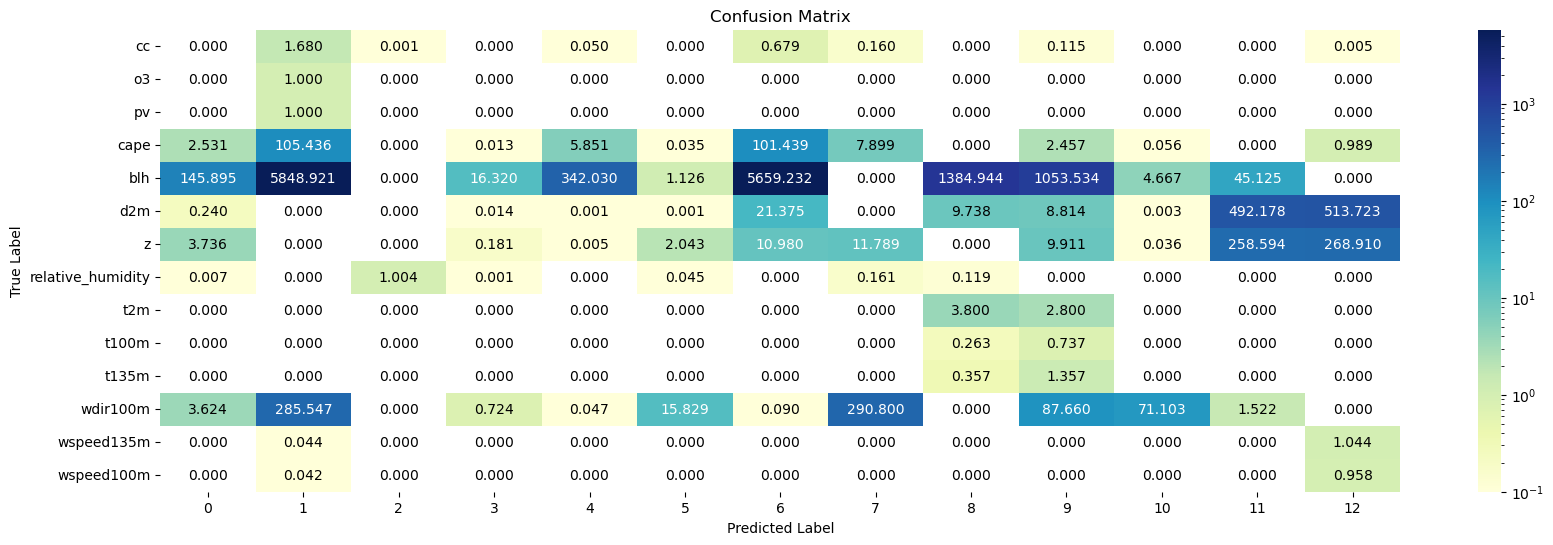

In [99]:
import pandas as pd
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.colors import FuncNorm

data = """
0.000 0.923 0.001 -0.000 0.000 -0.001 0.071 -0.173 0.000 0.176 0.001 0.002 0.000
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
5.952 0.000 0.000 0.021 9.155 -0.083 -157.786 -30.768 22.768 0.000 0.006 -3517.475 3669.369
-115.739 0.000 0.000 1.353 107.902 -0.603 -4126.973 -169.852 75.697 0.000 0.192 -95029.285 99255.451
0.000 0.000 -22.143 0.001 0.000 -0.003 22.214 0.000 7.206 -6.273 0.000 -0.002 0.000
-3.906 0.000 0.000 -0.032 -0.004 -17.943 441.383 64.968 -44.728 0.000 0.011 10038.256 -10477.352
0.000 0.000 0.997 -0.000 -0.000 0.044 0.000 -0.106 0.064 0.000 -0.000 0.000 0.000
-0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.263 0.737 0.000 0.000 0.000
0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 0.000
47.074 0.000 108.529 0.032 0.016 5.706 0.146 -161.679 -12.670 0.000 8.088 6.231 0.000
0.000 0.000 -0.044 0.000 -0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.042 0.000 0.000 -0.000 0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 0.958
"""

matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.absolute(np.array(matrix))

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(20, 6))
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

data_log = np.log1p(np_matrix)  # log(1 + data)
log_norm = LogNorm(vmin=0.1, vmax=np_matrix.max())

# Create a cbar_kws dictionary to pass to sns.heatmap
ax = sns.heatmap(np_matrix, annot=np_matrix, cmap="YlGnBu", norm = log_norm, vmin=0, vmax=np_matrix.max(), fmt=".3f", yticklabels=columns,cbar=True)
# Format colorbar tick labels as integers

for text in ax.texts:
    text_color = 'black' if float(text.get_text()) < 10 else 'white'
    text.set_color(text_color)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

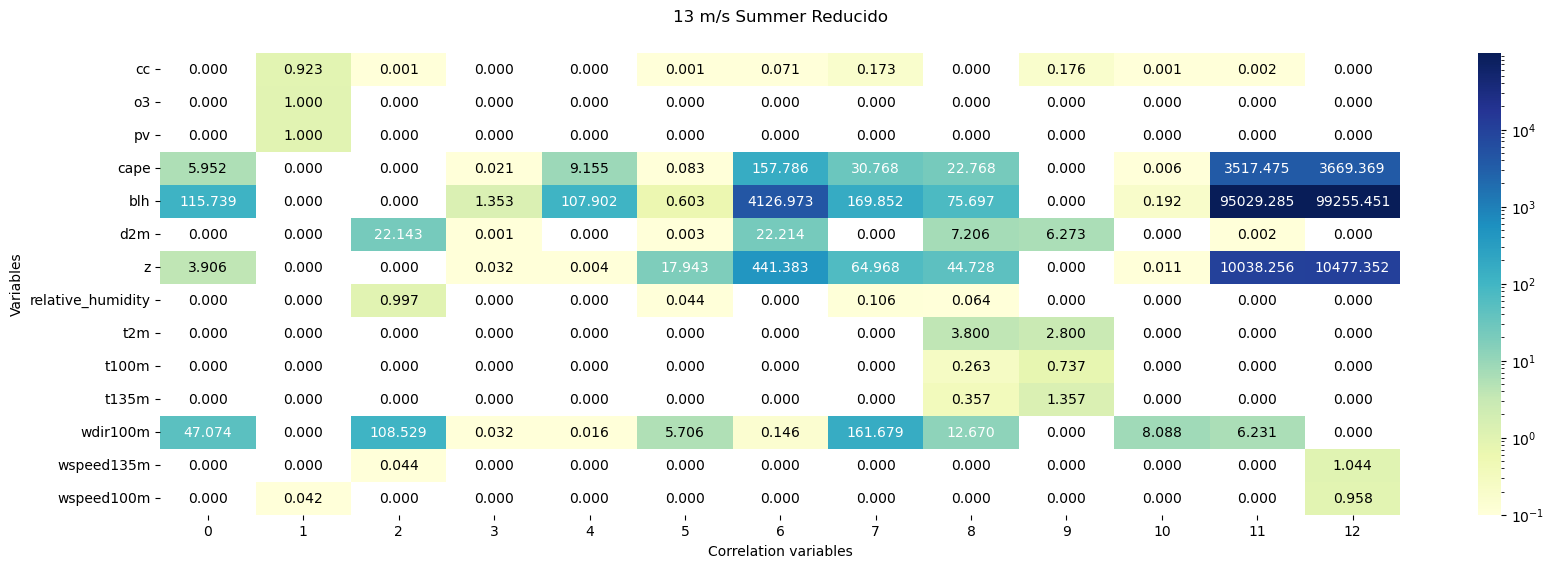

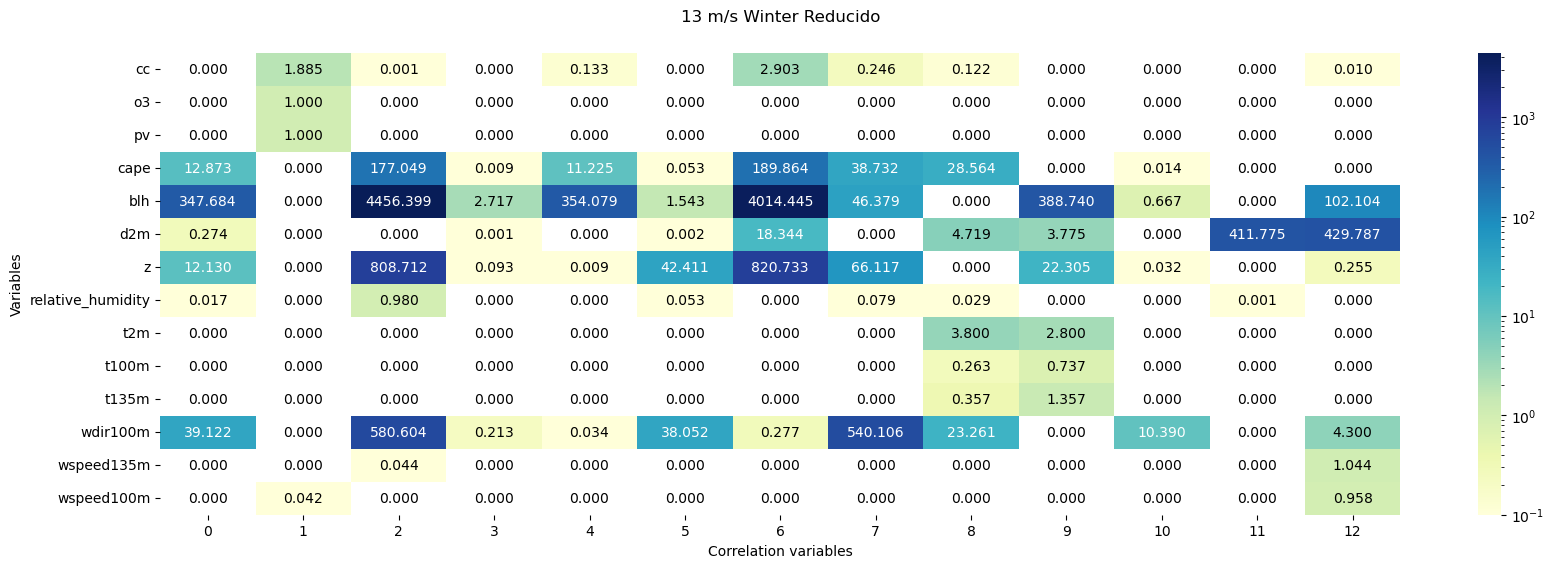

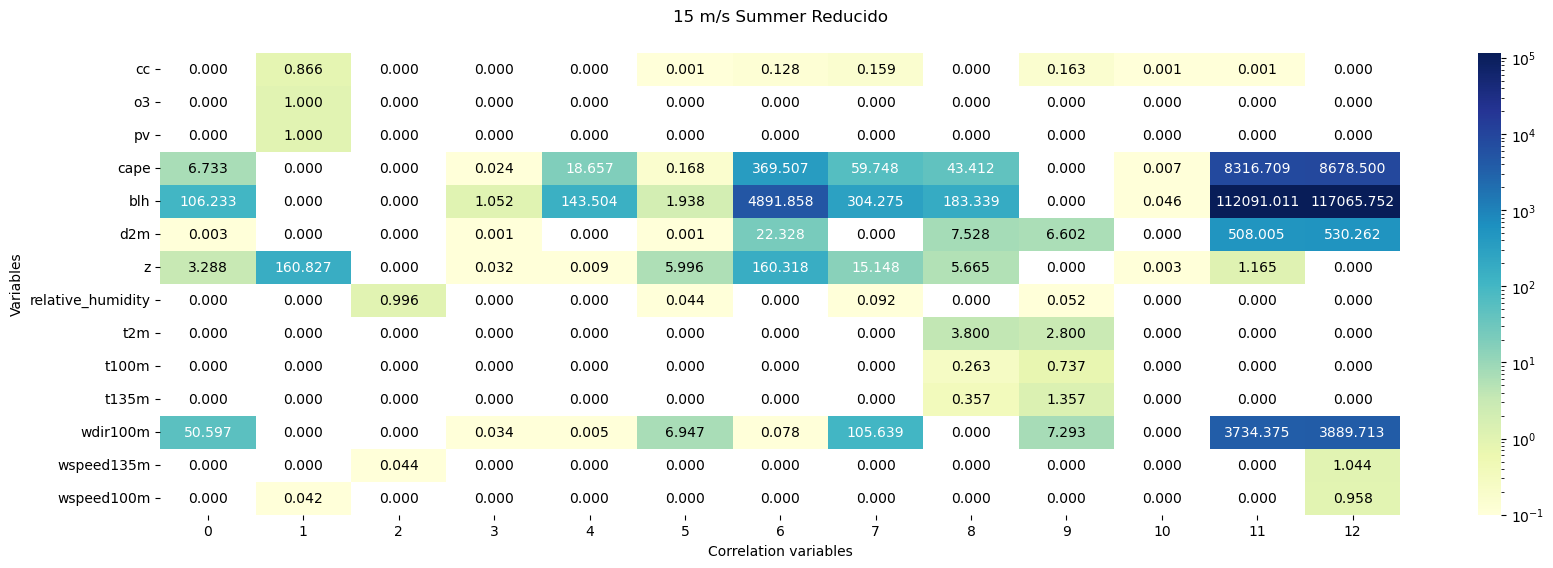

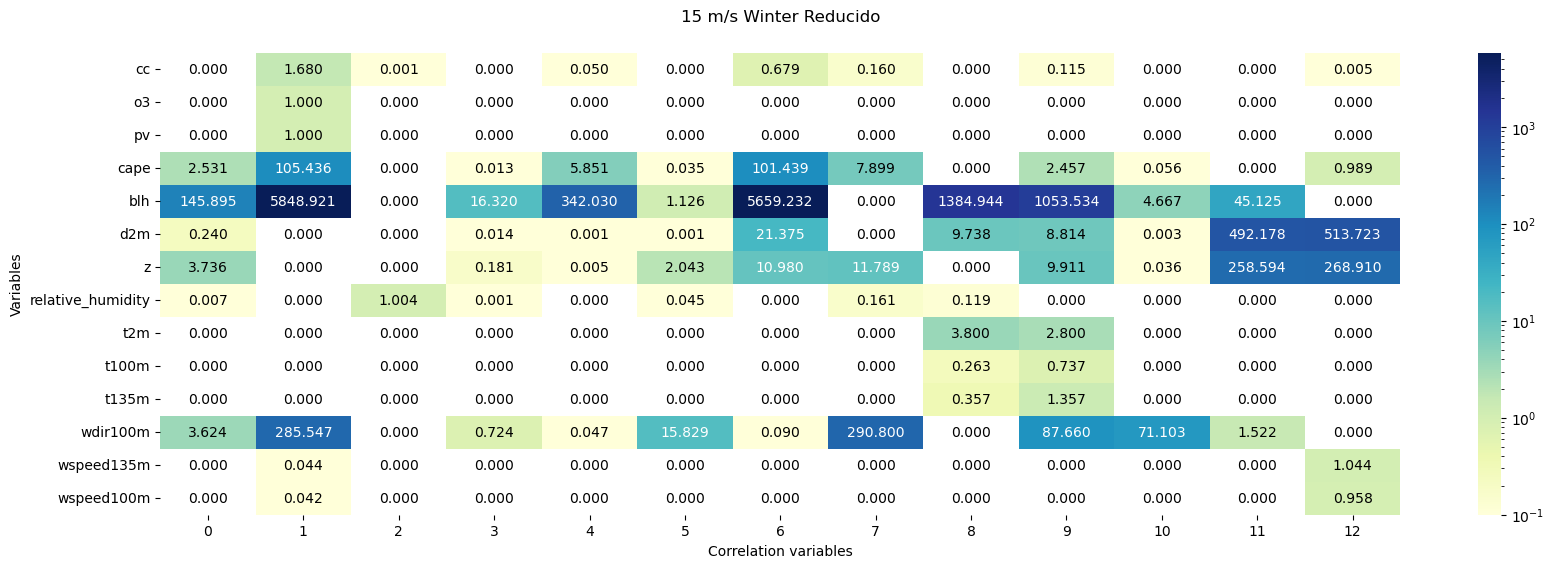

In [100]:
data = """
0.000 0.923 0.001 -0.000 0.000 -0.001 0.071 -0.173 0.000 0.176 0.001 0.002 0.000
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
5.952 0.000 0.000 0.021 9.155 -0.083 -157.786 -30.768 22.768 0.000 0.006 -3517.475 3669.369
-115.739 0.000 0.000 1.353 107.902 -0.603 -4126.973 -169.852 75.697 0.000 0.192 -95029.285 99255.451
0.000 0.000 -22.143 0.001 0.000 -0.003 22.214 0.000 7.206 -6.273 0.000 -0.002 0.000
-3.906 0.000 0.000 -0.032 -0.004 -17.943 441.383 64.968 -44.728 0.000 0.011 10038.256 -10477.352
0.000 0.000 0.997 -0.000 -0.000 0.044 0.000 -0.106 0.064 0.000 -0.000 0.000 0.000
-0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.263 0.737 0.000 0.000 0.000
0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 0.000
47.074 0.000 108.529 0.032 0.016 5.706 0.146 -161.679 -12.670 0.000 8.088 6.231 0.000
0.000 0.000 -0.044 0.000 -0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.042 0.000 0.000 -0.000 0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 0.958
"""
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.absolute(np.array(matrix))

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(20, 6))
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

data_log = np.log1p(np_matrix)  # log(1 + data)
log_norm = LogNorm(vmin=0.1, vmax=np_matrix.max())

# Create a cbar_kws dictionary to pass to sns.heatmap
ax = sns.heatmap(np_matrix, annot=np_matrix, cmap="YlGnBu", norm = log_norm, vmin=0, vmax=np_matrix.max(), fmt=".3f", yticklabels=columns,cbar=True)
# Format colorbar tick labels as integers

for text in ax.texts:
    text_color = 'black' if float(text.get_text()) < 10 else 'white'
    text.set_color(text_color)

plt.ylabel('Variables')
plt.xlabel('Correlation variables')
plt.title('13 m/s Summer Reducido', y=1.05)
plt.show()

data = """
0.000 -1.885 0.001 0.000 -0.133 -0.000 2.903 0.246 -0.122 0.000 -0.000 0.000 -0.010
0.000 1.000 0.000 0.000 0.000 0.000 -0.000 -0.000 0.000 0.000 0.000 0.000 -0.000
-0.000 1.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 0.000
12.873 0.000 177.049 0.009 11.225 -0.053 -189.864 -38.732 28.564 0.000 -0.014 0.000 0.000
347.684 0.000 -4456.399 2.717 -354.079 -1.543 4014.445 -46.379 0.000 388.740 0.667 0.000 102.104
-0.274 0.000 0.000 0.001 -0.000 -0.002 18.344 0.000 4.719 -3.775 0.000 411.775 -429.787
-12.130 0.000 -808.712 -0.093 -0.009 -42.411 820.733 66.117 0.000 -22.305 -0.032 0.000 -0.255
0.017 0.000 0.980 -0.000 0.000 0.053 0.000 -0.079 0.029 0.000 -0.000 -0.001 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 0.263 0.737 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 0.000
-39.122 0.000 580.604 -0.213 0.034 38.052 -0.277 -540.106 -23.261 0.000 -10.390 0.000 -4.300
0.000 0.000 -0.044 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.042 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.958
"""
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.absolute(np.array(matrix))

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(20, 6))
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

data_log = np.log1p(np_matrix)  # log(1 + data)
log_norm = LogNorm(vmin=0.1, vmax=np_matrix.max())

# Create a cbar_kws dictionary to pass to sns.heatmap
ax = sns.heatmap(np_matrix, annot=np_matrix, cmap="YlGnBu", norm = log_norm, vmin=0, vmax=np_matrix.max(), fmt=".3f", yticklabels=columns,cbar=True)
# Format colorbar tick labels as integers

for text in ax.texts:
    text_color = 'black' if float(text.get_text()) < 10 else 'white'
    text.set_color(text_color)

plt.ylabel('Variables')
plt.xlabel('Correlation variables')
plt.title('13 m/s Winter Reducido', y=1.05)
plt.show()

data = """
0.000 0.866 0.000 -0.000 0.000 -0.001 0.128 -0.159 0.000 0.163 0.001 0.001 0.000
0.000 1.000 0.000 -0.000 0.000 0.000 -0.000 -0.000 0.000 0.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 0.000
6.733 0.000 0.000 0.024 18.657 -0.168 -369.507 -59.748 43.412 0.000 0.007 -8316.709 8678.500
-106.233 0.000 0.000 1.052 143.504 -1.938 -4891.858 -304.275 183.339 0.000 0.046 -112091.011 117065.752
0.003 0.000 0.000 0.001 0.000 -0.001 22.328 0.000 7.528 -6.602 -0.000 508.005 -530.262
-3.288 -160.827 0.000 -0.032 -0.009 -5.996 160.318 15.148 -5.665 0.000 0.003 1.165 0.000
0.000 0.000 0.996 -0.000 -0.000 0.044 0.000 -0.092 0.000 0.052 0.000 0.000 0.000
0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.263 0.737 0.000 0.000 0.000
0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 0.000
50.597 0.000 0.000 0.034 0.005 -6.947 0.078 105.639 0.000 7.293 0.000 3734.375 -3889.713
0.000 0.000 -0.044 -0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.042 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.958
"""
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.absolute(np.array(matrix))

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(20, 6))
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

data_log = np.log1p(np_matrix)  # log(1 + data)
log_norm = LogNorm(vmin=0.1, vmax=np_matrix.max())

# Create a cbar_kws dictionary to pass to sns.heatmap
ax = sns.heatmap(np_matrix, annot=np_matrix, cmap="YlGnBu", norm = log_norm, vmin=0, vmax=np_matrix.max(), fmt=".3f", yticklabels=columns,cbar=True)
# Format colorbar tick labels as integers

for text in ax.texts:
    text_color = 'black' if float(text.get_text()) < 10 else 'white'
    text.set_color(text_color)

plt.ylabel('Variables')
plt.xlabel('Correlation variables')
plt.title('15 m/s Summer Reducido', y=1.05)
plt.show()

data = """
0.000 1.680 -0.001 0.000 0.050 -0.000 -0.679 -0.160 0.000 0.115 0.000 0.000 -0.005
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
-2.531 105.436 0.000 0.013 5.851 -0.035 -101.439 -7.899 0.000 2.457 -0.056 0.000 -0.989
145.895 -5848.921 0.000 16.320 -342.030 -1.126 5659.232 0.000 1384.944 -1053.534 4.667 45.125 0.000
0.240 0.000 0.000 0.014 -0.001 0.001 21.375 0.000 9.738 -8.814 0.003 492.178 -513.723
-3.736 0.000 0.000 -0.181 -0.005 2.043 10.980 11.789 0.000 -9.911 0.036 258.594 -268.910
-0.007 0.000 1.004 -0.001 0.000 0.045 0.000 -0.161 0.119 0.000 -0.000 -0.000 0.000
0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.263 0.737 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 -0.000
3.624 285.547 0.000 -0.724 0.047 15.829 0.090 -290.800 0.000 -87.660 71.103 1.522 0.000
-0.000 -0.044 0.000 0.000 -0.000 0.000 0.000 -0.000 -0.000 0.000 -0.000 0.000 1.044
-0.000 0.042 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.958
"""
matrix = [list(map(float, line.split())) for line in data.strip().split('\n')]
np_matrix = np.absolute(np.array(matrix))

# Step 2: Plotting the confusion matrix
plt.figure(figsize=(20, 6))
columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

data_log = np.log1p(np_matrix)  # log(1 + data)
log_norm = LogNorm(vmin=0.1, vmax=np_matrix.max())

# Create a cbar_kws dictionary to pass to sns.heatmap
ax = sns.heatmap(np_matrix, annot=np_matrix, cmap="YlGnBu", norm = log_norm, vmin=0, vmax=np_matrix.max(), fmt=".3f", yticklabels=columns,cbar=True)
# Format colorbar tick labels as integers

for text in ax.texts:
    text_color = 'black' if float(text.get_text()) < 10 else 'white'
    text.set_color(text_color)

plt.ylabel('Variables')
plt.xlabel('Correlation variables')
plt.title('15 m/s Winter Reducido', y=1.05)
plt.show()

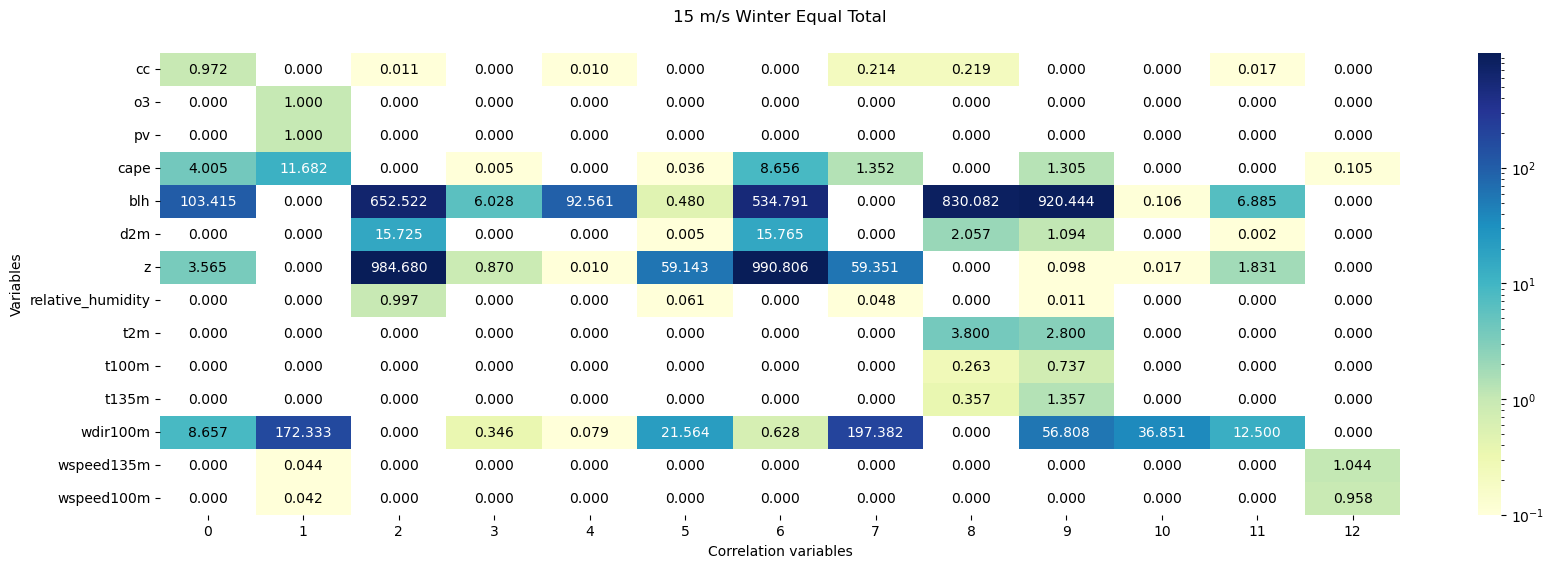

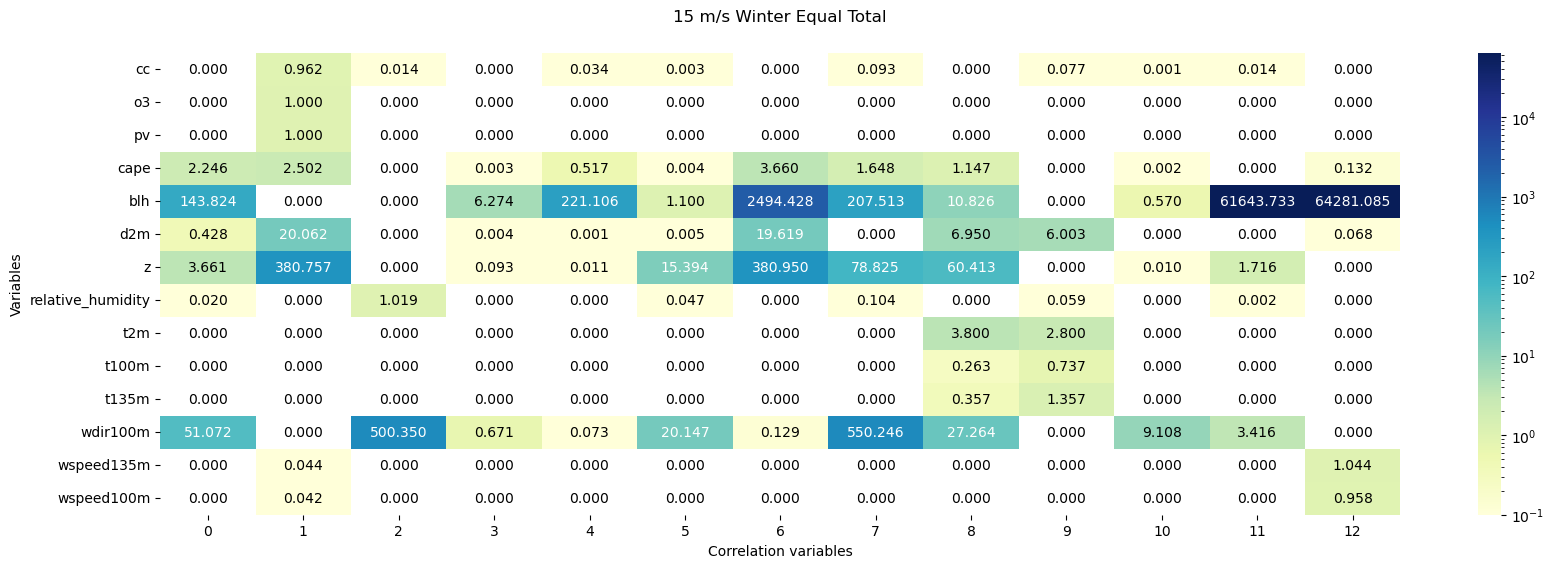

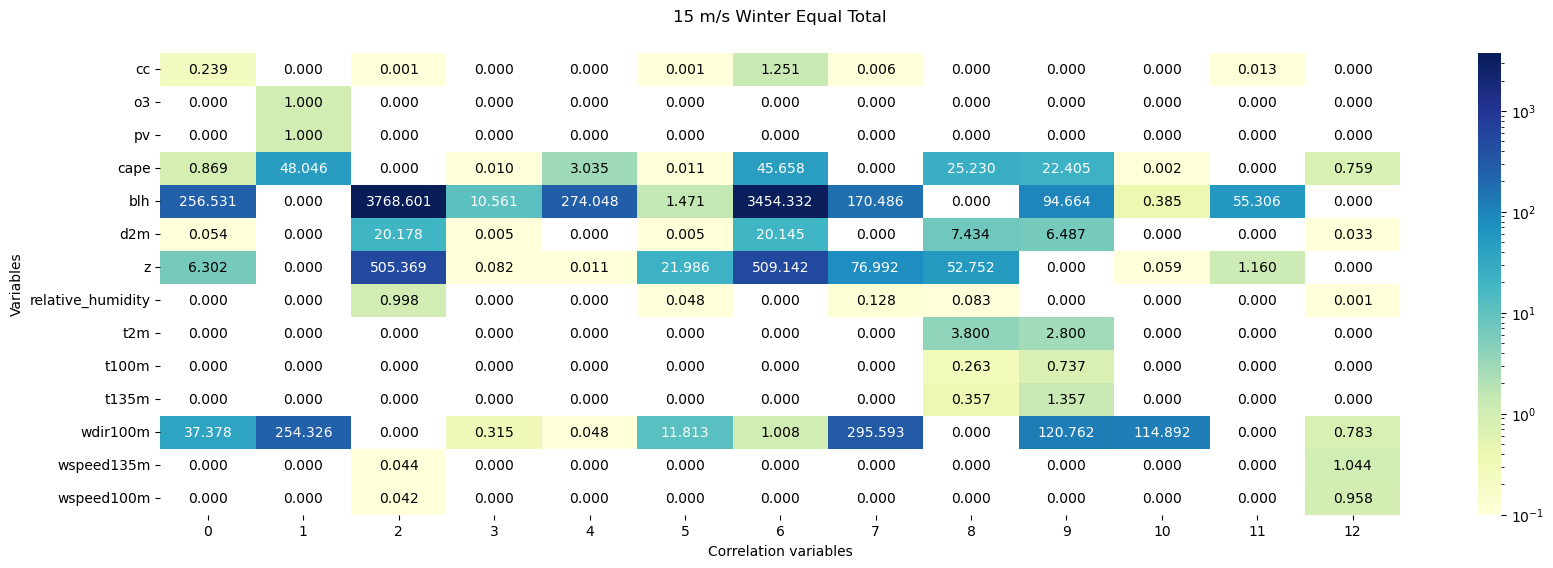

In [66]:
import pandas as pd
import polars as pl
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib.colors import FuncNorm

data = """
0.972 0.000 0.011 0.000 0.010 -0.000 0.000 0.214 -0.219 0.000 0.000 0.017 0.000
0.000 1.000 -0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 -0.000 0.000 0.000
0.000 1.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
4.005 -11.682 0.000 0.005 0.000 -0.036 8.656 1.352 0.000 -1.305 0.000 0.000 -0.105
103.415 0.000 -652.522 6.028 -92.561 -0.480 534.791 0.000 -830.082 920.444 -0.106 6.885 0.000
0.000 0.000 -15.725 0.000 -0.000 -0.005 15.765 0.000 2.057 -1.094 0.000 -0.002 0.000
-3.565 0.000 -984.680 -0.870 -0.010 -59.143 990.806 59.351 0.000 -0.098 -0.017 -1.831 0.000
0.000 0.000 0.997 0.000 0.000 0.061 0.000 -0.048 0.000 -0.011 -0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 -0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.263 0.737 0.000 0.000 0.000
0.000 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 -0.357 1.357 -0.000 0.000 -0.000
8.657 172.333 0.000 0.346 -0.079 21.564 -0.628 -197.382 0.000 -56.808 36.851 12.500 0.000
0.000 -0.044 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.042 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.958

0.000 0.962 0.014 0.000 0.034 -0.003 0.000 -0.093 0.000 0.077 -0.001 0.014 0.000
0.000 1.000 -0.000 -0.000 -0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 -0.000 0.000 0.000
2.246 2.502 0.000 0.003 0.517 -0.004 -3.660 -1.648 1.147 0.000 -0.002 0.000 -0.132
143.824 0.000 0.000 6.274 -221.106 -1.100 2494.428 207.513 10.826 0.000 0.570 61643.733 -64281.085
0.428 -20.062 0.000 0.004 -0.001 -0.005 19.619 0.000 6.950 -6.003 -0.000 0.000 0.068
-3.661 -380.757 0.000 -0.093 -0.011 -15.394 380.950 78.825 -60.413 0.000 -0.010 1.716 0.000
-0.020 0.000 1.019 -0.000 0.000 0.047 0.000 -0.104 0.000 0.059 0.000 -0.002 0.000
0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 -0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.263 0.737 -0.000 0.000 0.000
0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 0.000
-51.072 0.000 -500.350 -0.671 0.073 -20.147 -0.129 550.246 27.264 0.000 -9.108 3.416 0.000
0.000 -0.044 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.042 0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.958

-0.239 0.000 -0.001 0.000 0.000 -0.001 1.251 0.006 0.000 0.000 -0.000 -0.013 0.000
0.000 1.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000
0.000 1.000 0.000 -0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 -0.000 0.000 0.000
-0.869 48.046 0.000 0.010 3.035 -0.011 -45.658 0.000 -25.230 22.405 -0.002 0.000 -0.759
256.531 0.000 -3768.601 10.561 -274.048 -1.471 3454.332 170.486 0.000 94.664 0.385 55.306 0.000
0.054 0.000 -20.178 0.005 -0.000 -0.005 20.145 0.000 7.434 -6.487 -0.000 0.000 0.033
-6.302 0.000 -505.369 -0.082 -0.011 -21.986 509.142 76.992 -52.752 0.000 0.059 1.160 0.000
0.000 0.000 0.998 -0.000 0.000 0.048 0.000 -0.128 0.083 0.000 0.000 0.000 -0.001
0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 3.800 -2.800 0.000 0.000 0.000
0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.263 0.737 0.000 0.000 0.000
-0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.357 1.357 0.000 0.000 0.000
-37.378 -254.326 0.000 -0.315 0.048 -11.813 1.008 295.593 0.000 120.762 -114.892 0.000 0.783
0.000 0.000 -0.044 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.044
0.000 0.000 0.042 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.958
"""

chunks = [chunk for chunk in data.split('\n\n') if chunk]

# Convert each chunk into a matrix
matrices = [ [list(map(float, line.split())) for line in chunk.strip().split('\n')] for chunk in chunks ]

matrix1, matrix2, matrix3 = matrices

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']
for i,matrix in enumerate(matrices):
# Step 2: Plotting the confusion matrix

    np_matrix = np.absolute(np.array(matrix))
    plt.figure(figsize=(20, 6))

    data_log = np.log1p(np_matrix)  # log(1 + data)
    log_norm = LogNorm(vmin=0.1, vmax=np_matrix.max())

    # Create a cbar_kws dictionary to pass to sns.heatmap
    ax = sns.heatmap(np_matrix, annot=np_matrix, cmap="YlGnBu", norm = log_norm, vmin=0, vmax=np_matrix.max(), fmt=".3f", yticklabels=columns,cbar=True)
    # Format colorbar tick labels as integers

    for text in ax.texts:
        text_color = 'black' if float(text.get_text()) < 10 else 'white'
        text.set_color(text_color)

    plt.ylabel('Variables')
    plt.xlabel('Correlation variables')
    plt.title('15 m/s Winter Equal Total', y=1.05)
    plt.savefig(f"15_winter_equal_total_{i}.png", dpi=300, format='png', bbox_inches='tight')
    # plt.show()

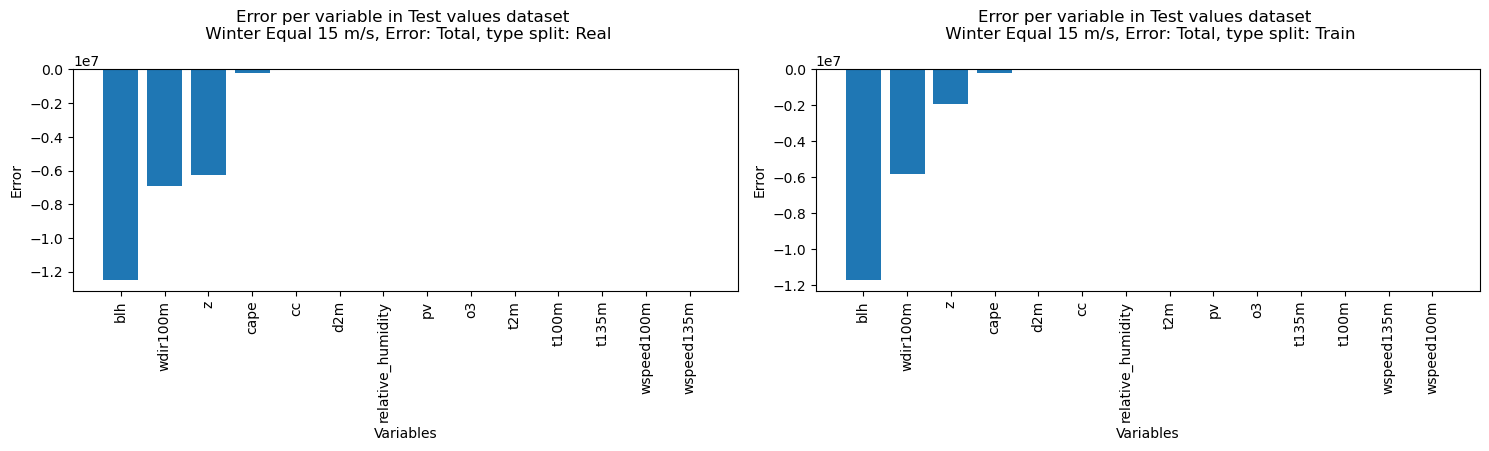

In [72]:
import matplotlib.pyplot as plt

input_str = """
5:-12513190.114588873
12:-6921091.98895109
7:-6287175.083701062
4:-192065.77533633544
1:-46006.09961603098
6:-34012.559550000624
8:-1788.9748870682874
3:-0.06298319295391955
2:-0.05598079116507894
9:-0.05585815385483789
10:-0.01888097919020776
11:-0.010423398319431803
14:-0.003941354436398941
13:-0.003360721512932522

5:-11751446.895210791
12:-5802321.447017245
7:-1910245.6274621554
4:-189920.1811403125
6:-17865.188891939317
1:-12855.340196476536
8:-1031.7156318023372
9:-0.028679125882186022
3:-0.022107945550821174
2:-0.02151105827469153
11:-0.008482733936271532
10:-0.002558717798980971
13:-0.0013458463986664522
14:-0.0012891608144282923
"""

chunks = [chunk for chunk in input_str.split('\n\n') if chunk]

lines = [chunk.strip().split('\n') for chunk in chunks]

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed135m','wspeed100m']

typs = ["real","train"]

fig = plt.figure(figsize=(15, 7))  # Adjust the width and height as needed

for i,elemento in enumerate(lines):
    data = [(int(line.split(':')[0]), float(line.split(':')[1])) for line in elemento]

    data_real = []
    column_real = []
    for element in data:
        data_real.append(float(element[1]))
        column_real.append(columns[element[0]-1])

    # Create subplots

    plt.subplot(len(lines), 2, i + 1)

    # Create bar plot for each set of data
    plt.bar(column_real, data_real)

    # Add title and labels
    plt.title(f"Error per variable in Test values dataset \n Winter Equal 15 m/s, Error: Total, type split: {typs[i].capitalize()}", y = 1.10)
    plt.xlabel("Variables")
    plt.ylabel("Error")
    plt.xticks(rotation=90)  # Rotate column names for better visibility

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig(f"15_winter_equal_total.png", dpi=300, format='png', bbox_inches='tight')
plt.show()

### Relacion entre variables

In [4]:
import numpy as np
summer = "47.074 0.000 108.529 0.032 0.016 5.706 0.146 -161.679 -12.670 0.000 8.088 6.231 0.000"
summer = np.abs(list(map(float, summer.split())))
winter = "-39.122 0.000 580.604 -0.213 0.034 38.052 -0.277 -540.106 -23.261 0.000 -10.390 0.000 -4.300"
winter = np.abs(list(map(float, winter.split())))
summer_15 = "50.597 0.000 0.000 0.034 0.005 -6.947 0.078 105.639 0.000 7.293 0.000 3734.375 -3889.713"
summer_15 = np.abs(list(map(float, summer_15.split())))
winter_15 = "3.624 285.547 0.000 -0.724 0.047 15.829 0.090 -290.800 0.000 -87.660 71.103 1.522 0.000"
winter_15 = np.abs(list(map(float, winter_15.split())))

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wspeed135m','wspeed100m']


(290.8, 285.547, 87.66, 71.103, 15.829, 3.624, 1.522, 0.724, 0.09, 0.047, 0.0, 0.0, 0.0)
('relative_humidity', 'o3', 't100m', 't135m', 'd2m', 'cc', 'wspeed135m', 'cape', 'z', 'blh', 'wspeed100m', 't2m', 'pv')


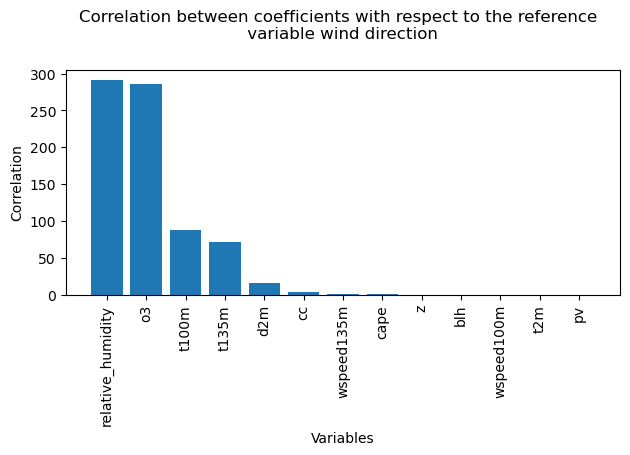

In [21]:
zipped_lists = zip(winter_15, columns)
sorted_pairs = sorted(zipped_lists, reverse=True)
sorted_values, sorted_names = zip(*sorted_pairs)
print(sorted_values)
print(sorted_names)

import matplotlib.pyplot as plt

plt.bar(sorted_names, sorted_values)

# Add title and labels
plt.title("Correlation between coefficients with respect to the reference  \n variable wind direction ", y = 1.10)
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()

In [51]:
import numpy as np
high = "0.000 0.042 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.958"
high = np.abs(list(map(float, high.split())))
low = "0.000 0.042 0.000 0.000 -0.000 0.000 0.000 -0.000 -0.000 0.000 0.000 0.000 0.958"
low = np.abs(list(map(float, low.split())))
moderate = "-0.000 0.042 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.958"
moderate = np.abs(list(map(float, moderate.split())))

columns = ['cc','o3','pv','cape','blh','d2m','z','relative_humidity','t2m','t100m','t135m','wdir100m','wspeed100m']

(0.958, 0.042, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
('wspeed100m', 'o3', 'z', 'wdir100m', 't2m', 't135m', 't100m', 'relative_humidity', 'pv', 'd2m', 'cc', 'cape', 'blh')


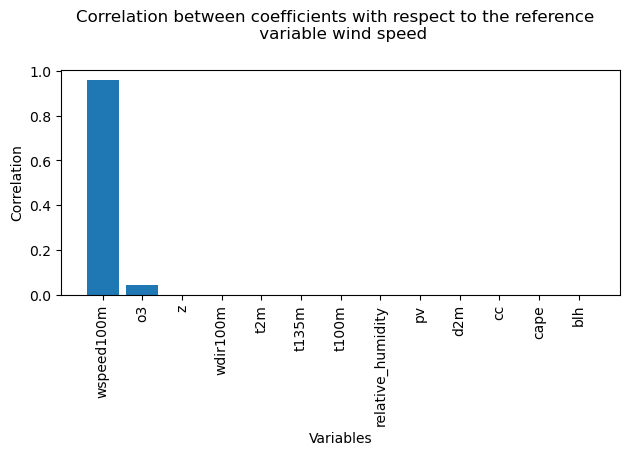

In [54]:
zipped_lists = zip(low, columns)
sorted_pairs = sorted(zipped_lists, reverse=True)
sorted_values, sorted_names = zip(*sorted_pairs)
print(sorted_values)
print(sorted_names)

import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
plt.bar(sorted_names, sorted_values)

# Add title and labels
plt.title("Correlation between coefficients with respect to the reference  \n variable wind speed", y = 1.10)
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate column names for better visibility

# Show the chart
plt.tight_layout()
plt.show()